**seq2seq의 문제점**

-Encoder의 출력은 고정 길이 벡터
-고정 길이 벡터는 입력 문장의 길이에 관계x 항상 같은 길이벡터로 변환!
<<Encoder는 고정 길이의 벡터로 변환하기 때문에 필요한 정보 벡터에 다 담기지 못함.>>

**Encoder 개선**

Encoder출력의 길이를 입력 문장의 길이에 따라 만들어 주는것이 좋음.

-LSTM 계층의 은닉 상태의 '내용': 직전에 입력된 단어에 정보포함多

예) "고양이" 입력시 LSTM계층의 은닉상태는 "고양이"영향&"고양이"성분이 많이 들어간 벡터
>> 해결방안: 시각별 LSTM계층의 은닉 상태 벡터 모두 이용
이로써 입력된 단어와 같은 수의 벡터를 얻으면서 '고정 길이 벡터'제약으로부터 해결

**Decoder개선**

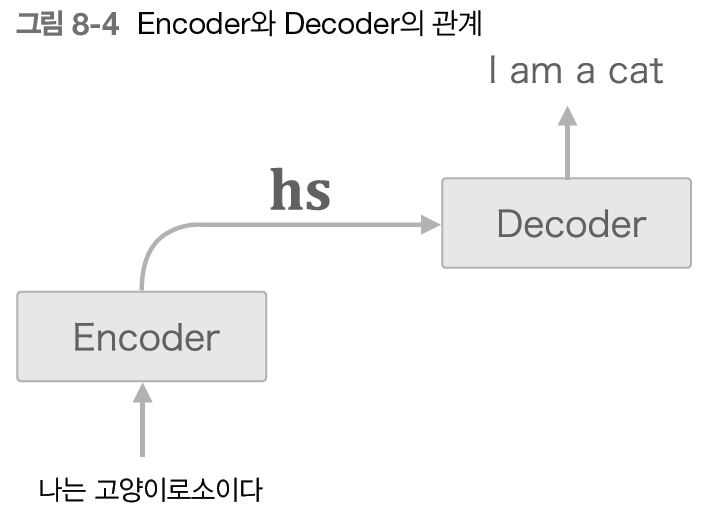

hs를 각 단어에 해당하는 벡터들의 집합이라고 보면
Encoder는 hs로 모아 출력을 하고 Decoder로 전달되어 시계열 변환이 이뤄짐.

**개선 후의 Decoder의 계층 구성**

같은 단어의 대응 관계를 나타내는 정보를 얼라인먼트(alignment)라고 하는데 지금까지 수작업으로 얼라인먼트를 만들었다면 어텐션 메커니즘을 활용하면 얼라인먼트를 자동으로 만들 수 있다.

예를 들어 한국어를 영어로 번역한다고 가정했을 때 '특정 영어 단어'와 대응 관계가 있는 '특정 한국어 단어' 정보를 골라내는 것이 어텐션의 핵심포인트.

Encoder의 LSTM계층의 '마지막'은닉 상태를 Decoder의 LSTM계층의 '첫'은닉 상태로 설정

어텐션의 구조: 입력과 출력 여러단어 중 서로 관련있는 단어끼리 seq2seq에 학습을 시켜 시계열변환을 수행하는것

**단어에 대한 가중치 구하기**

단어들의 얼라인먼트를 추출하는것이 우리의 목적 즉 Decoder의 각 스텝에서 출력하고자 하는 단어와 대응 관계인 단어의 벡터를 hs에서 골라 내겠다는것.

문제는 여러 대상으로 부터 몇개를 선택하는 작업은 미분을 할 수 없다.
고로 모든 단어들을 선택을 하고 '가중치'(각 단어의 중요도)가 큰 단어를 선택한다.

**가중합 계산 그래프**
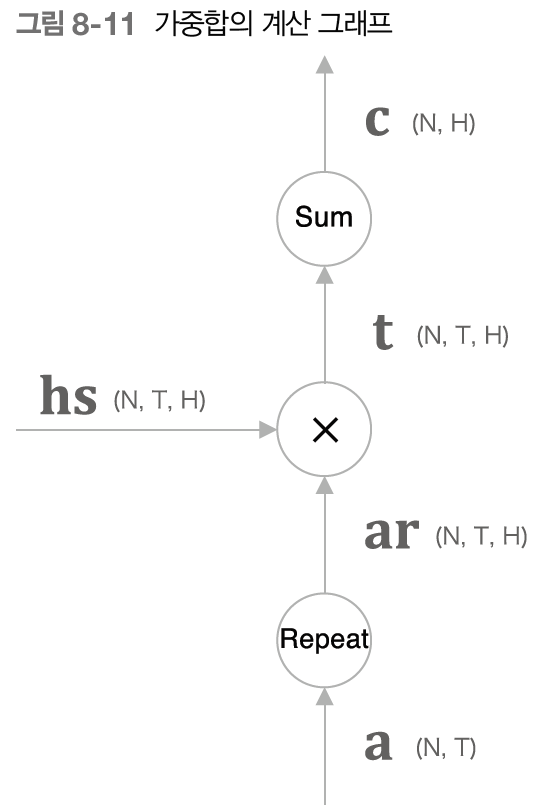

Repeat노드로 a를 복제, 'x'노드로 원소별 곱을 계산 후 Sum노드로 합 구함.

**가중치 a구하기**
단어의 중요성을 나타내는 가중치: a

가중합을 이용해 맥락 벡터를 얻을 수 있음.

가중치 a를 구하는 방법
1. Decoder의 첫번째 LSTM계층이 은닉 상태 벡터를 출력할 때까지의 처리 알아보기
> 내적으로 두 벡터 h와 hs 내적으로 유사도를 산출.

s는 h와 hs의 유사도 결과. 이때의 s는 정규화 전의 값이기에 Softmax 함수를 적용한다.

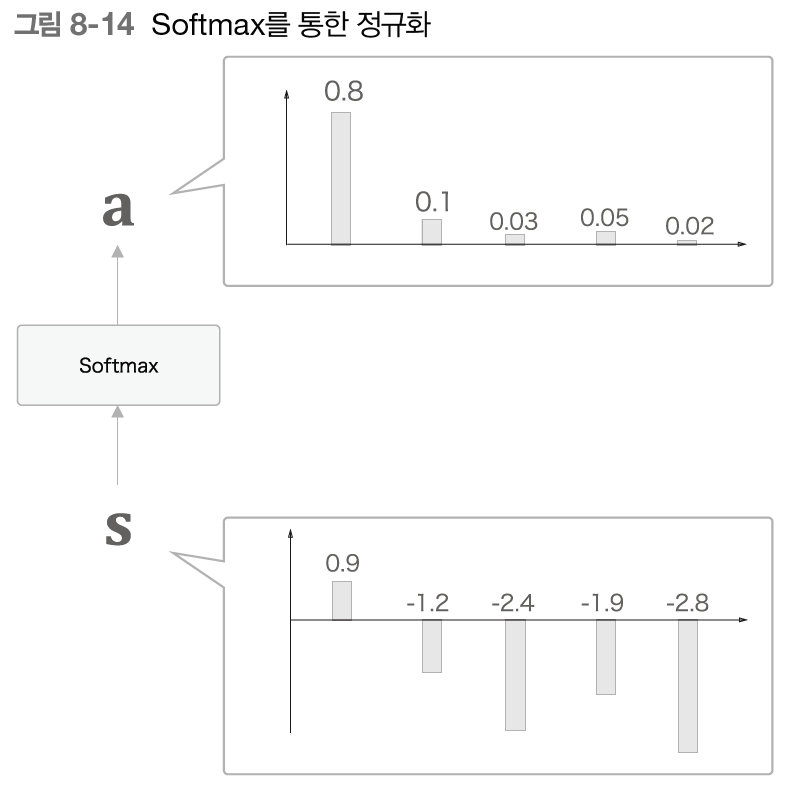

소프트맥스 함수를 이용하면 a의 각 원소는 0.0~1.0사이의 값이 되고 모든 원소의 총합은 1이 된다.

지금까지의 Decoder의 개선안으로 Attetion Weight계층과 Weight Sum계층을 구현하였다.
이 두 계층을 하나로 결합을 한다.

1.Attetion Weight계층은 Encoder가 출력하는 각 단어의 벡터hs에 주목하여 해당 단어의 가중치 a를 구한다.

2.Weight Sum계층은 a와 hs의 가중합을 구하고 그 결과를 맥락벡터 c로 출력한다.

이 일련의 계산을 수행하는 계층을 Attention계층이라고 한다.

Attention계층을 LSTM계층과 Affine계층에 삽입

각 시각의 Attention계층에는 Encoder의 출력인 hs가 입력.
LSTM계층의 은닉 상태 벡터를 Affine계층에 입력.